<a href="https://colab.research.google.com/github/athulya216/gitClass/blob/master/weather%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/seattle-weather (2).csv")
data.head(6)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain


In [3]:
data.tail(10)

,date,precipitation,temp_max,temp_min,wind,weather
1451,2015-12-22,4.6,7.8,2.8,5.0,rain
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
data.isnull().sum()


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
data['date'] = pd.to_datetime(data['date'])
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

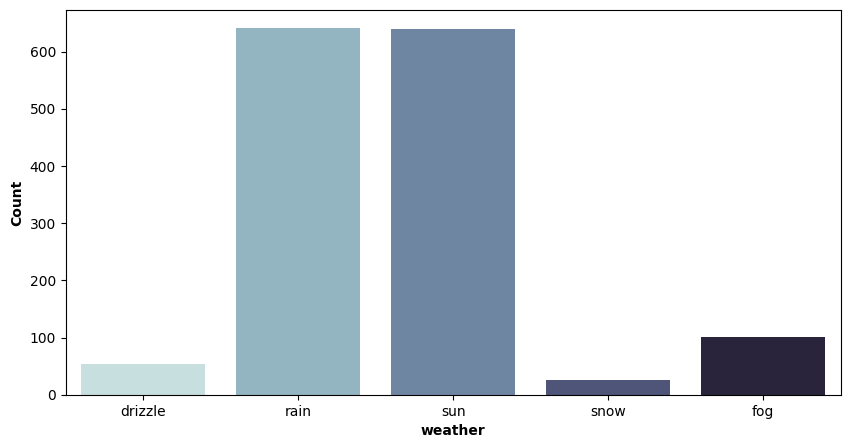

In [7]:
plt.figure(figsize=(10,5))
#sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=10)
plt.ylabel("Count",fontweight='bold',size=10)
plt.show()

In [9]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [10]:
data = data.drop('date',axis=1)

In [11]:
x = data.drop('weather',axis=1)
y = data['weather']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
y_pred

array([4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [18]:
print(list(y_test))

[4, 4, 2, 4, 4, 2, 2, 2, 1, 2, 4, 2, 1, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 1, 1, 2, 1, 4, 2, 4, 2, 2, 4, 2, 4, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 1, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 1, 4, 4, 4, 2, 2, 1, 4, 2, 2, 2, 4, 1, 2, 4, 2, 4, 0, 2, 4, 2, 3, 4, 4, 4, 2, 2, 2, 2, 2, 3, 0, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 0, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 0, 4, 2, 1, 4, 2, 4, 2, 4, 4, 2, 1, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 1, 1, 4, 4, 2, 2, 1, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 1, 2, 4, 4, 4, 1, 0, 2, 2, 4, 1, 4, 0, 3, 4, 4, 4, 2, 2, 2, 1, 4, 4, 3, 2, 2, 2, 4, 1, 1, 2, 2, 2, 0, 4, 4, 2, 1, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 1, 2, 2, 2, 2, 4, 2, 2, 4, 2, 1, 4, 1, 4, 0, 2, 3, 4, 4, 4, 4, 4, 4, 3, 4, 1, 4, 4, 2, 4, 2, 4, 1, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 0, 2, 1, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred,labels=[0,1,2,3,4])
#disp = ConfusionMatrixDisplay(confusion_matrix=cm).
#disp.plot()
"""
[[  0   3   0  28   0]
 [  0 130   0  25   0]
 [  0   6   0   0   0]
 [  0  14   0 149   0]
 [  0   0   0   0   0]]
"""
print(cm)

[[  0   0   0   0  11]
 [  0   0   3   0  28]
 [  0   0 130   0  25]
 [  0   0   6   0   0]
 [  0   0  14   0 149]]


In [ ]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.7622950819672131
